In [55]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt

import wave, os, glob
%matplotlib inline

import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model,to_categorical

from sklearn.model_selection import train_test_split
from google.colab import drive


from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


dataset = pd.read_pickle('/content/drive/My Drive/ICBHI_data/Final_Data.pkl')
dataset_sequential = dataset.copy()


Mounted at /content/drive/


In [7]:
dataset_sequential

,index,Patient number,Age,Sex,Diagnosis,Binary_diagnosis,Recording index,mfccs,chroma,mel,...,Chest location_Ll,Chest location_Lr,Chest location_Pl,Chest location_Pr,Chest location_Tc,Acquisition mode_mc,Acquisition mode_sc,Recording equipment_AKGC417L,Recording equipment_LittC2SE,Recording equipment_Meditron
0,0,101,3.00,0,URTI,Unhealthy,1b1,"[-528.42523, 104.517365, 69.907585, 42.572124,...","[0.80671513, 0.8066955, 0.8320573, 0.8765917, ...","[46.26634, 18.62562, 6.161757, 2.8784091, 1.03...",...,False,False,False,False,False,False,True,False,False,True
1,1,101,3.00,0,URTI,Unhealthy,1b1,"[-582.5047, 95.39471, 57.40218, 31.435293, 28....","[0.8172376, 0.83850676, 0.86833954, 0.89889115...","[17.473001, 2.0139313, 0.198458, 0.067585096, ...",...,False,False,False,True,False,False,True,False,False,True
2,2,102,0.75,0,Healthy,Healthy,1b1,"[-596.8061, 116.009735, 60.59253, 25.570185, 2...","[0.81662965, 0.85524493, 0.9108528, 0.9124299,...","[6.2047653, 0.60025597, 0.102930844, 0.0519275...",...,False,False,False,False,False,False,True,False,False,True
3,4,105,7.00,0,URTI,Unhealthy,1b1,"[-354.35706, 177.72319, 23.68711, -61.08058, 5...","[0.84354645, 0.9046195, 0.86379474, 0.8055111,...","[6.8732758, 2.2774293, 0.5358679, 0.16095991, ...",...,False,False,False,False,True,False,True,False,False,True
4,5,106,73.00,0,COPD,Unhealthy,2b1,"[-464.31815, 72.642876, 63.004265, 51.5027, 41...","[0.83281016, 0.7995087, 0.7973027, 0.80576605,...","[234.72874, 39.58054, 53.76158, 28.220192, 9.0...",...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,819,224,10.00,0,Healthy,Healthy,1b2,"[-547.4475, 75.98515, 54.631798, 41.02187, 34....","[0.84370035, 0.8341989, 0.85375684, 0.8836045,...","[39.994473, 13.610375, 1.1346987, 0.13204911, ...",...,False,False,False,False,False,False,True,False,False,True
817,820,225,0.83,0,Healthy,Healthy,1b1,"[-533.13995, 99.10363, 55.93617, 30.745462, 24...","[0.8169379, 0.8169047, 0.8328133, 0.8611766, 0...","[35.39508, 4.80749, 1.4905819, 0.43252712, 0.0...",...,False,False,True,False,False,False,True,False,False,True
818,821,226,4.00,0,Pneumonia,Unhealthy,1b1,"[-520.4204, 102.1701, 62.05142, 36.29775, 32.7...","[0.8446185, 0.83890134, 0.83978844, 0.83535963...","[34.4036, 5.8527074, 1.0365623, 0.29175016, 0....",...,False,False,False,False,False,False,True,False,False,True
819,822,226,4.00,0,Pneumonia,Unhealthy,1b1,"[-484.38248, 85.32702, 64.266525, 45.73867, 36...","[0.850083, 0.85153455, 0.86403704, 0.878169, 0...","[145.206, 21.312765, 4.0849094, 0.6241147, 0.2...",...,True,False,False,False,False,False,True,False,False,True


In [8]:
dataset_sequential.columns = dataset_sequential.columns.map(str)

start = dataset_sequential.columns.get_loc("0")
end = dataset_sequential.columns.get_loc("192")
label_id = dataset_sequential.columns.get_loc("Diagnosis")
data = dataset_sequential.iloc[:, start: end]
labels = dataset_sequential.iloc[:, label_id]

In [17]:
labels

,Diagnosis
0,URTI
1,URTI
2,Healthy
3,URTI
4,COPD
...,...
816,Healthy
817,Healthy
818,Pneumonia
819,Pneumonia


In [11]:
data_numpy = data.to_numpy()
labels_numpy = labels.to_numpy()

In [33]:
# Create a dictionary for mapping
to_one_hot = {"COPD":0, "Healthy":1, "URTI":2, "Bronchiectasis":3, "Pneumonia":4, "Bronchiolitis":5, "Asthma":6, "LRTI":7}

vectorized_mapping = np.vectorize(to_one_hot.get)
labels_numpy_OHE = vectorized_mapping(labels_numpy)
labels_numpy_cat = to_categorical(labels_numpy_OHE)

In [34]:
labels_numpy_cat.shape

(821, 6)

In [48]:
# Split data into train and test
X_train_val, X_test, y_train_val, y_test = train_test_split(data_numpy, labels_numpy_cat, test_size=0.1, random_state=10)

#Split train data into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=10)


# Format new data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1],  1))


In [50]:
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(193, 1)))

model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(SeparableConv1D(256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(SeparableConv1D(256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=200, verbose=1)


Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step - accuracy: 0.4546 - loss: 1.4628 - val_accuracy: 0.8916 - val_loss: 0.5493
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step - accuracy: 0.8360 - loss: 0.7483 - val_accuracy: 0.8916 - val_loss: 0.4997
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 716ms/step - accuracy: 0.8376 - loss: 0.7306 - val_accuracy: 0.8916 - val_loss: 0.4810
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.8385 - loss: 0.6465 - val_accuracy: 0.8916 - val_loss: 0.5468
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.8456 - loss: 0.6005 - val_accuracy: 0.8916 - val_loss: 0.4564
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.8403 - loss: 0.5902 - val_accuracy: 0.8916 - val_loss: 0.4340
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.8438 - loss: 0.5864 - val_accuracy: 0.8916 - val_loss: 0.4423
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.8450 - loss: 0.5538 - val_accuracy: 0.8916 - val_loss:

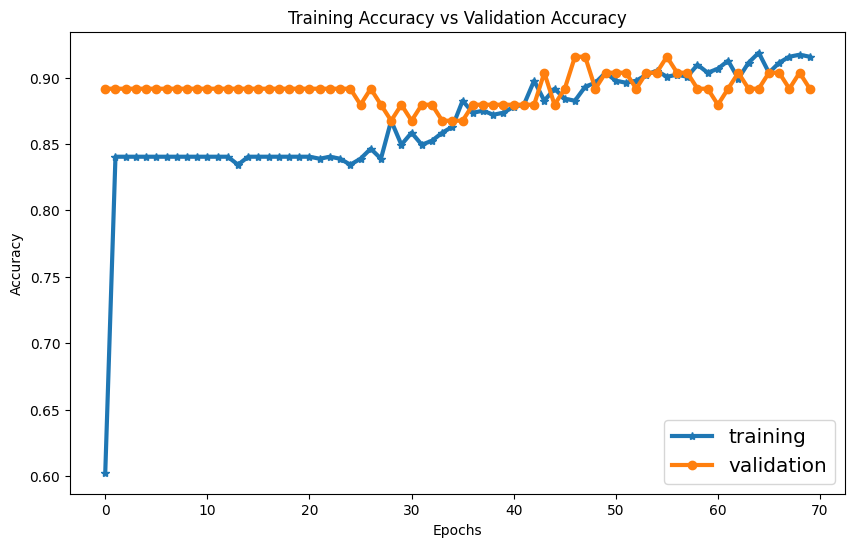

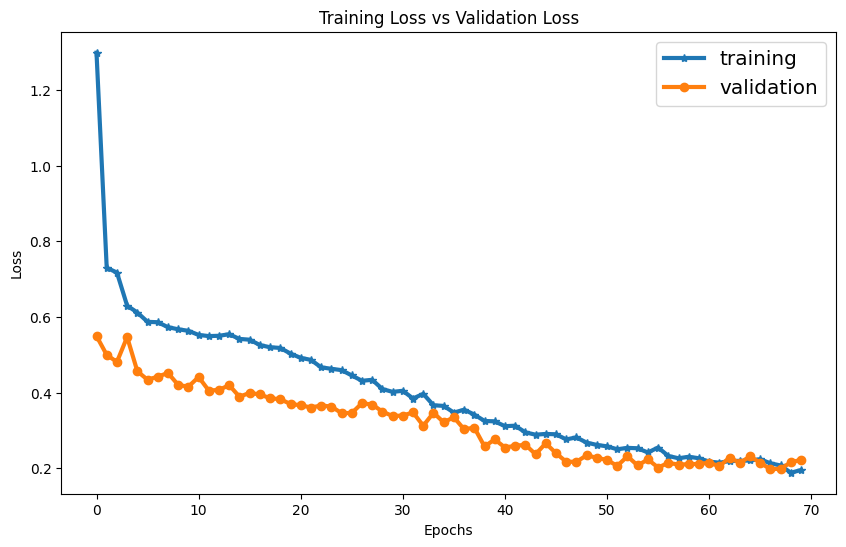

In [51]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
                precision    recall  f1-score   support

          COPD       1.00      0.96      0.98        74
       Healthy       0.20      0.33      0.25         3
          URTI       0.00      0.00      0.00         4
Bronchiectasis       1.00      1.00      1.00         1
     Pneumoina       0.33      1.00      0.50         1
 Bronchiolitis       0.00      0.00      0.00         0

      accuracy                           0.89        83
     macro avg       0.42      0.55      0.45        83
  weighted avg       0.91      0.89      0.90        83



<Axes: xlabel='Predicted', ylabel='Actual'>

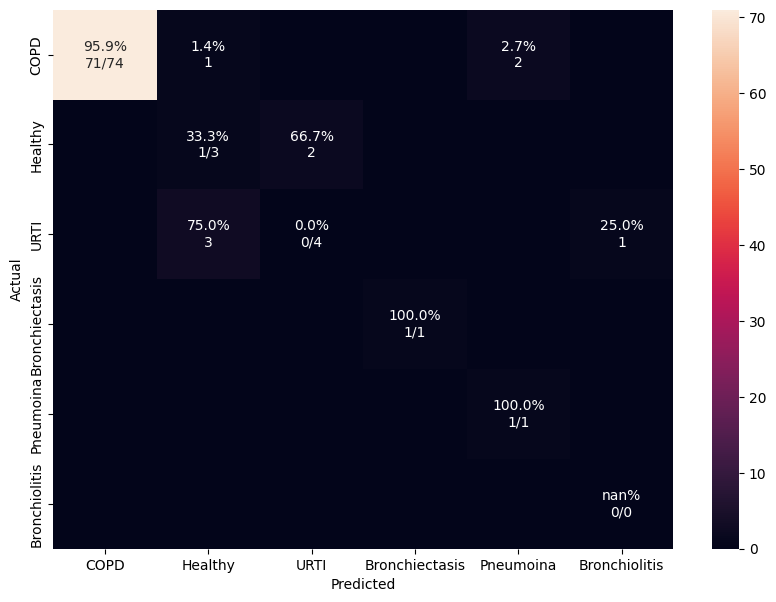

In [56]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis"]

preds = model.predict(X_test)
classpreds = np.argmax(preds, axis=1) # predicted classes
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')

In [57]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9028 - loss: 0.1967


[0.22246262431144714, 0.891566276550293]

In [60]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [61]:
predicted_classes

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0])

In [63]:
model.save("/content/drive/My Drive/ICBHI_data/my_model.keras")
